# PROBLEM STATEMENT

- Credit card companies need to have the ability to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

- Datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- The data contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

- Input Features: V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

- Output: 1 in case of fraud and 0 otherwise.
- Link to the dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/home


# LIBRARIES IMPORT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# IMPORT DATASET

In [2]:
dataset = pd.read_csv('dataset/creditcard.csv')

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189993,128642,-4.104727,-6.427418,-0.244885,1.127862,-5.273876,2.542047,5.119460,-0.110626,0.871499,...,1.350632,0.490818,4.495794,-0.138225,0.596833,0.642188,-0.681687,0.148119,1895.62,0
189994,128642,1.823026,-0.843607,-0.370617,-0.078704,-0.591871,0.518070,-0.922626,0.293359,1.379948,...,0.098528,0.225343,0.206179,0.220376,-0.466206,-0.121727,0.008134,-0.027379,82.25,0
189995,128642,-3.071057,2.756098,-1.322399,-0.853683,-1.089836,-0.057287,-1.449201,1.959757,1.074990,...,-0.079803,-0.067558,0.256664,0.002438,0.013214,0.390669,0.360547,0.238892,6.36,0
189996,128642,-0.012301,-0.459139,2.615611,0.788064,-1.479649,1.779497,-1.510414,-0.368898,0.314480,...,0.418305,-0.330376,-0.474348,-0.633641,1.585230,-0.014476,0.238071,0.174602,56.00,0


In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,...,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000,189998.000000
mean,67472.431747,-0.123271,0.011198,0.372664,0.087086,-0.132062,0.050777,-0.060121,0.021926,0.011897,...,-0.017942,-0.058594,-0.017658,0.005442,0.070407,0.007945,0.001779,0.002104,89.238972,0.001953
std,32573.783277,1.882621,1.619743,1.431349,1.391993,1.356672,1.306754,1.213172,1.212482,1.139985,...,0.739651,0.684511,0.604655,0.602429,0.483171,0.489304,0.392890,0.310539,248.106986,0.044146
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43233.500000,-0.968513,-0.571520,-0.250223,-0.779426,-0.798476,-0.704011,-0.580291,-0.175385,-0.661812,...,-0.228081,-0.540574,-0.169167,-0.339317,-0.227662,-0.331225,-0.066778,-0.038392,5.990000,0.000000
50%,65122.000000,-0.115847,0.087004,0.533577,0.089262,-0.187752,-0.213408,-0.017546,0.047018,-0.075015,...,-0.046330,-0.044540,-0.031035,0.054483,0.114247,-0.060700,0.006820,0.019263,22.800000,0.000000
75%,84755.750000,1.203684,0.787108,1.247929,0.903545,0.436793,0.446220,0.487957,0.341655,0.630310,...,0.144501,0.405313,0.110243,0.419939,0.389050,0.264697,0.089267,0.078149,79.000000,0.000000
max,128643.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189998 entries, 0 to 189997
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    189998 non-null  int64  
 1   V1      189998 non-null  float64
 2   V2      189998 non-null  float64
 3   V3      189998 non-null  float64
 4   V4      189998 non-null  float64
 5   V5      189998 non-null  float64
 6   V6      189998 non-null  float64
 7   V7      189998 non-null  float64
 8   V8      189998 non-null  float64
 9   V9      189998 non-null  float64
 10  V10     189998 non-null  float64
 11  V11     189998 non-null  float64
 12  V12     189998 non-null  float64
 13  V13     189998 non-null  float64
 14  V14     189998 non-null  float64
 15  V15     189998 non-null  float64
 16  V16     189998 non-null  float64
 17  V17     189998 non-null  float64
 18  V18     189998 non-null  float64
 19  V19     189998 non-null  float64
 20  V20     189998 non-null  float64
 21  V21     18

In [6]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

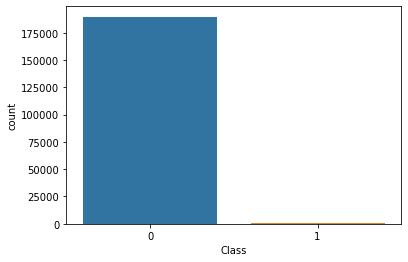

In [7]:
sns.countplot(dataset['Class'])

In [8]:
not_fraud = dataset[dataset['Class'] == 0]
fraud = dataset[dataset['Class'] == 1]

print('% not_fraud = ', (len(not_fraud)/len(dataset['Class']))*100, '%' )
print('count not_fraud = ', len(not_fraud) )
print('% fraud = ', (len(fraud)/len(dataset['Class']))*100, '%' )
print('count fraud = ', len(fraud))

% not_fraud =  99.80473478668198 %
count not_fraud =  189627
% fraud =  0.19526521331803492 %
count fraud =  371


# VISUALIZE DATASET

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


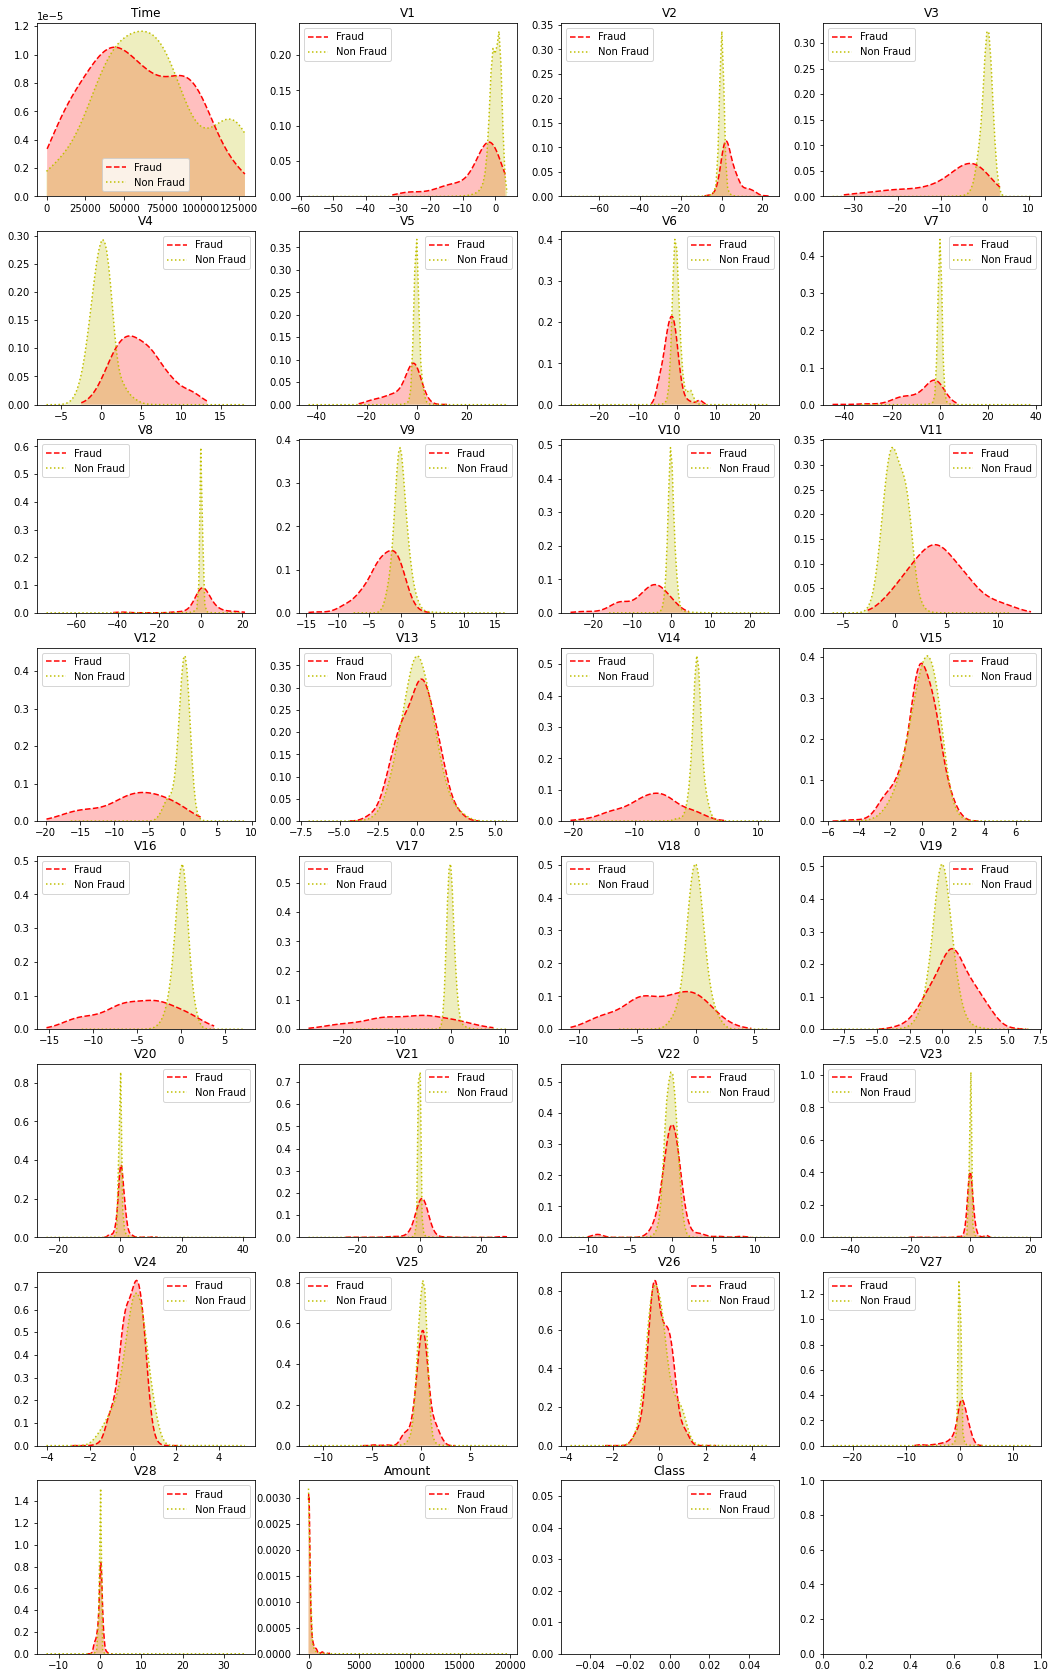

In [11]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i = 1
column_headers = dataset.columns

fig, ax = plt.subplots(8,4,figsize=(18,30))
for column_header in column_headers:    
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[column_header], bw = 0.4, label = "Fraud", shade=True, color="r", linestyle="--")
    sns.kdeplot(not_fraud[column_header], bw = 0.4, label = "Non Fraud", shade=True, color= "y", linestyle=":")
    plt.title(column_header, fontsize=12)
    i = i + 1
plt.show();

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X = dataset.drop(['Class'], axis = 1).values
y = dataset['Class'].values

print(X.shape, y.shape)

(189998, 30) (189998,)


In [22]:
X = scaler.fit_transform(X)

print(X)

[[-2.07137773 -0.65681776 -0.0518471  ...  0.33541064 -0.07457086
   0.24336754]
 [-2.07137773  0.69856407  0.15740389 ... -0.0273928   0.04063949
  -0.34883822]
 [-2.07134703 -0.65604593 -0.83430793 ... -0.14541519 -0.19918928
   1.16652011]
 ...
 [ 1.87788224 -1.5657919   1.69465642 ...  0.91315345  0.76250901
  -0.33404618]
 [ 1.87788224  0.05894441 -0.29037832 ...  0.60142098  0.55548117
  -0.13397067]
 [ 1.87791294 -0.39883153 -0.28834004 ...  0.2454363  -0.34215551
  -0.1121252 ]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(151998, 30) (151998,)
(38000, 30) (38000,)


# TRAINING THE MODEL

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# EVALUATING THE MODEL

In [32]:
y_predict_train = classifier.predict(X_train)

print(y_predict_train.shape)

(151998,)


        Pred:0  Pred:1
True:0  148421    3279
True:1      52     246


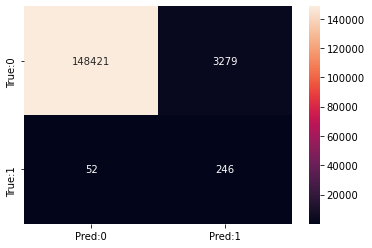

In [33]:
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

In [34]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    151700
           1       0.07      0.83      0.13       298

    accuracy                           0.98    151998
   macro avg       0.53      0.90      0.56    151998
weighted avg       1.00      0.98      0.99    151998



In [35]:
y_predict = classifier.predict(X_test)

print(y_predict.shape)

(38000,)


        Pred:0  Pred:1
True:0   37121     806
True:1       8      65


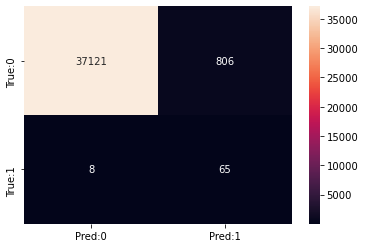

In [36]:
cm = confusion_matrix(y_test, y_predict)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

In [37]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37927
           1       0.07      0.89      0.14        73

    accuracy                           0.98     38000
   macro avg       0.54      0.93      0.56     38000
weighted avg       1.00      0.98      0.99     38000



# IMPROVING THE MODEL

In [39]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189993,128642,-4.104727,-6.427418,-0.244885,1.127862,-5.273876,2.542047,5.119460,-0.110626,0.871499,...,1.350632,0.490818,4.495794,-0.138225,0.596833,0.642188,-0.681687,0.148119,1895.62,0
189994,128642,1.823026,-0.843607,-0.370617,-0.078704,-0.591871,0.518070,-0.922626,0.293359,1.379948,...,0.098528,0.225343,0.206179,0.220376,-0.466206,-0.121727,0.008134,-0.027379,82.25,0
189995,128642,-3.071057,2.756098,-1.322399,-0.853683,-1.089836,-0.057287,-1.449201,1.959757,1.074990,...,-0.079803,-0.067558,0.256664,0.002438,0.013214,0.390669,0.360547,0.238892,6.36,0
189996,128642,-0.012301,-0.459139,2.615611,0.788064,-1.479649,1.779497,-1.510414,-0.368898,0.314480,...,0.418305,-0.330376,-0.474348,-0.633641,1.585230,-0.014476,0.238071,0.174602,56.00,0


In [40]:
X = dataset.drop([
    'Time', 'V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'
], axis = 1)

X = scaler.fit_transform(X)

In [41]:
X

array([[-6.56817764e-01, -5.18471019e-02,  1.51164220e+00, ...,
         5.12253041e-01, -4.92870443e-04,  2.43367541e-01],
       [ 6.98564069e-01,  1.57403892e-01, -1.44049257e-01, ...,
        -1.60355717e-01, -2.80988788e-01, -3.48838221e-01],
       [-6.56045928e-01, -8.34307926e-01,  9.78481364e-01, ...,
        -2.74920997e+00,  3.59549530e-01,  1.16652011e+00],
       ...,
       [-1.56579190e+00,  1.69465642e+00, -1.18424442e+00, ...,
        -7.57367194e-01, -8.36357083e-02, -3.34046177e-01],
       [ 5.89444073e-02, -2.90378323e-01,  1.56701944e+00, ...,
         2.83466101e-01,  5.89802995e-01, -1.33970671e-01],
       [-3.98831529e-01, -2.88340042e-01, -5.82410189e-01, ...,
         1.11295334e+00, -5.15561047e-01, -1.12125199e-01]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(151998, 18) (151998,)
(38000, 18) (38000,)


In [43]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [44]:
y_predict = classifier.predict(X_test)

        Pred:0  Pred:1
True:0   37357     570
True:1       8      65


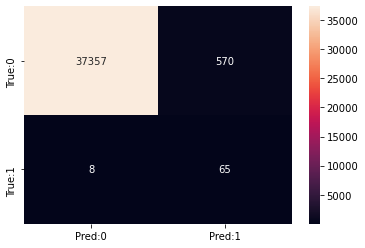

In [45]:
cm = confusion_matrix(y_test, y_predict)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37927
           1       0.10      0.89      0.18        73

    accuracy                           0.98     38000
   macro avg       0.55      0.94      0.59     38000
weighted avg       1.00      0.98      0.99     38000



## Whole dataset result

        Pred:0  Pred:1
True:0  186807    2820
True:1      54     317


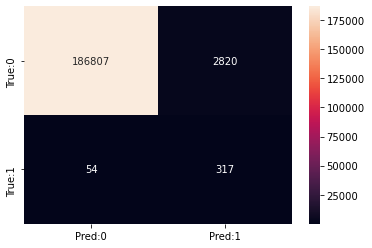

In [51]:
y_predict = classifier.predict(X)

cm = confusion_matrix(y, y_predict)
conf_matrix = pd.DataFrame(data = cm, columns = ['Pred:0','Pred:1'], index = ['True:0','True:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

In [52]:
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    189627
           1       0.10      0.85      0.18       371

    accuracy                           0.98    189998
   macro avg       0.55      0.92      0.59    189998
weighted avg       1.00      0.98      0.99    189998



# Very poor result, RandomForest Classifier given better result